# **Semana 01 - Equipe DS**

## **Extração e Carregamento dos Dados**

O objetivo principal deste notebook é fornecer ao time uma base padronizada e validada, pronta para uso nas tarefas da Semana 01:

- Qualidade e Estrutura dos Dados   
- Distribuições e Comportamento das Variáveis  
- Correlações e Relações Entre Variáveis  
- Sazonalidade (Tempo: Mês, Dia, Horário)  
- Segmentação (Companhias & Aeroportos)

In [23]:
# Instalar gdown (baixa arquivos do Google Drive por ID)
!pip install -q gdown
!pip install -q unidecode

# Import de bibliotecas essenciais
import gdown
import os
import zipfile
import pandas as pd
import numpy as np
import glob
import unidecode
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Carregamento dos dados

In [2]:
# ID do Dataset
#https://drive.google.com/file/d/1207psedBKvnS0pJkDITroSzPiWrcz0ag/view?usp=sharing
file_id = "1207psedBKvnS0pJkDITroSzPiWrcz0ag"

# Nome do arquivo que será baixado no Colab
zip_path = "dados_vra.zip"

# Se ainda não existir o zip, baixa do Drive
if not os.path.exists(zip_path):
    url = f"https://drive.google.com/uc?id={file_id}"
    print("Baixando arquivo do Drive...")
    gdown.download(url, zip_path, quiet=False)
else:
    print("Arquivo ZIP já existe, download interrompido.")

# Extrair o conteúdo do zip
extract_folder = "dados_vra"

if not os.path.exists(extract_folder):
    print("Extraindo arquivos do ZIP...")
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall(extract_folder)
else:
    print("Pasta de dados já existe.")

Baixando arquivo do Drive...


Downloading...
From (original): https://drive.google.com/uc?id=1207psedBKvnS0pJkDITroSzPiWrcz0ag
From (redirected): https://drive.google.com/uc?id=1207psedBKvnS0pJkDITroSzPiWrcz0ag&confirm=t&uuid=0c34f4ce-ba64-48f6-8df7-d2a034dec65a
To: /content/dados_vra.zip
100%|██████████| 59.2M/59.2M [00:01<00:00, 55.5MB/s]


Extraindo arquivos do ZIP...


In [3]:
def carregar_vra(
    pasta="/content/dados_vra/dados_vra",
    padrao="VRA_*.csv",
    sep=";",
    encoding="latin-1",
    skiprows=1
):
    # Encontrar arquivos
    caminho_busca = os.path.join(pasta, padrao)
    arquivos = sorted(glob.glob(caminho_busca))

    if not arquivos:
        raise FileNotFoundError(f"Nenhum arquivo encontrado com o padrão: {caminho_busca}")

    print(f"{len(arquivos)} arquivos encontrados:")

    dfs = []
    colunas_referencia = None

    # Ler e validar estrutura
    for arquivo in arquivos:
        df_temp = pd.read_csv(
            arquivo,
            sep=sep,
            encoding=encoding,
            skiprows=skiprows
        )

        # Define colunas de referência com o primeiro arquivo
        if colunas_referencia is None:
            colunas_referencia = list(df_temp.columns)
            print("Colunas de referência definidas.")
        else:
            # Compara colunas dos demais arquivos
            colunas_atual = list(df_temp.columns)
            if colunas_atual != colunas_referencia:
                print("Estrutura diferente!")
                print("Colunas esperadas: ", colunas_referencia)
                print("Colunas encontradas: ", colunas_atual)
                raise ValueError(f"Estrutura de colunas diferente no arquivo: {arquivo}")

        dfs.append(df_temp)

    # Concatenar tudo
    df_final = pd.concat(dfs, ignore_index=True)
    print(f"\nConcatenação concluída. \nShape final: {df_final.shape}")

    return df_final


## Validação do dataset

In [4]:
# Checagem se todos os arquivos serão importados e concatenados
caminho = "/content/dados_vra/dados_vra/VRA_*.csv"

arquivos = glob.glob(caminho)
print(len(arquivos), "arquivos encontrados")

total_linhas = 0
for arq in arquivos:
    df_temp = pd.read_csv(arq, sep=";", skiprows=1, low_memory=False)
    total_linhas += df_temp.shape[0]

print("\nTotal de linhas esperado:", total_linhas)

54 arquivos encontrados

Total de linhas esperado: 3968418


In [5]:
df = carregar_vra(pasta="/content/dados_vra/dados_vra", padrao="VRA_*.csv")
linhas_importadas = df.shape[0]
print("Total de linhas importadas: ", linhas_importadas)


54 arquivos encontrados:
Colunas de referência definidas.


/tmp/ipython-input-1955925677.py:22: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-1955925677.py:22: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-1955925677.py:22: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-1955925677.py:22: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-1955925677.py:22: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-1955925677.py:22: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-195


Concatenação concluída. 
Shape final: (3968418, 12)
Total de linhas importadas:  3968418


In [6]:
if total_linhas == linhas_importadas:
    print("Total de linhas importadas é igual ao total esperado. Prossiga com a analise\n\n\n")
    display(df.head())
else:
    print("Total de linhas importadas é diferente do total esperado. Verifique o código")

Total de linhas importadas é igual ao total esperado. Prossiga com a analise





,ICAO Empresa AÃ©rea,NÃºmero Voo,CÃ³digo AutorizaÃ§Ã£o (DI),CÃ³digo Tipo Linha,ICAO AerÃ³dromo Origem,ICAO AerÃ³dromo Destino,Partida Prevista,Partida Real,Chegada Prevista,Chegada Real,SituaÃ§Ã£o Voo,CÃ³digo Justificativa
0,TAM,3447,0,N,SBGR,SBFI,2021-01-09 20:25:00,2021-01-09 20:21:00,2021-01-09 22:05:00,2021-01-09 21:56:00,REALIZADO,NaN
1,TAM,3447,0,N,SBGR,SBFI,2021-01-10 20:25:00,2021-01-10 20:24:00,2021-01-10 22:05:00,2021-01-10 21:55:00,REALIZADO,NaN
2,TAM,3447,0,N,SBGR,SBFI,2021-01-11 20:25:00,2021-01-11 20:27:00,2021-01-11 22:05:00,2021-01-11 21:58:00,REALIZADO,NaN
3,TAM,3447,0,N,SBGR,SBFI,2021-01-12 20:25:00,2021-01-12 20:24:00,2021-01-12 22:05:00,2021-01-12 21:58:00,REALIZADO,NaN
4,TAM,3447,0,N,SBGR,SBFI,2021-01-13 20:25:00,2021-01-13 20:16:00,2021-01-13 22:05:00,2021-01-13 21:48:00,REALIZADO,NaN


## Padronização dos Nomes das Variáveis

In [7]:
df.columns

Index(['ICAO Empresa AÃ©rea', 'NÃºmero Voo', 'CÃ³digo AutorizaÃ§Ã£o (DI)',
       'CÃ³digo Tipo Linha', 'ICAO AerÃ³dromo Origem',
       'ICAO AerÃ³dromo Destino', 'Partida Prevista', 'Partida Real',
       'Chegada Prevista', 'Chegada Real', 'SituaÃ§Ã£o Voo',
       'CÃ³digo Justificativa'],
      dtype='object')

In [8]:
df.columns = [c.encode("latin1").decode("utf-8") for c in df.columns]
df.columns

Index(['ICAO Empresa Aérea', 'Número Voo', 'Código Autorização (DI)',
       'Código Tipo Linha', 'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino',
       'Partida Prevista', 'Partida Real', 'Chegada Prevista', 'Chegada Real',
       'Situação Voo', 'Código Justificativa'],
      dtype='object')

In [9]:
mapa_colunas = {
    "ICAO Empresa Aérea" : "empresa_aerea",
    "Número Voo" : "numero_voo",
    "Código Autorização (DI)" : "codigo_autorizacao_di",
    "Código Tipo Linha" : "codigo_tipo_linha",
    "ICAO Aeródromo Origem" : "aerodromo_origem",
    "ICAO Aeródromo Destino" : "aerodromo_destino",
    "Partida Prevista" : "partida_prevista",
    "Partida Real" : "partida_real",
    "Chegada Prevista" : "chegada_prevista",
    "Chegada Real" : "chegada_real",
    "Situação Voo" : "situacao_voo",
    "Código Justificativa" : "codigo_justificativa",
}

df = df.rename(columns=mapa_colunas)
df.columns

Index(['empresa_aerea', 'numero_voo', 'codigo_autorizacao_di',
       'codigo_tipo_linha', 'aerodromo_origem', 'aerodromo_destino',
       'partida_prevista', 'partida_real', 'chegada_prevista', 'chegada_real',
       'situacao_voo', 'codigo_justificativa'],
      dtype='object')

## Dicionário de Variáveis

A tabela abaixo descreve cada coluna do dataset, com seu nome padronizado no notebook, o nome original fornecido pela ANAC e sua definição oficial.

| Nome Padronizado | Nome Original ANAC | Descrição |
|------------------|--------------------|-----------|
| `empresa_aerea` | Sigla ICAO Empresa Aérea | Sigla/designador ICAO da empresa aérea responsável pelo voo. |
| `numero_voo` | Número Voo | Numeração identificadora do voo. |
| `codigo_autorizacao_di` | Código DI | Dígito Identificador (DI) utilizado para identificar a etapa do voo. |
| `codigo_tipo_linha` | Código Tipo Linha | Identifica o tipo de linha/serviço prestado no voo. |
| `aerodromo_origem` | ICAO Aeródromo Origem| Sigla ICAO Aeroporto Origem |
| `aerodromo_destino` | ICAO Aeródromo Destino| Sigla ICAO Aeroporto Destino |
| `partida_prevista` | Partida Prevista | Data e horário programados da partida (horário de Brasília). |
| `partida_real` | Partida Real | Data e horário reais da partida. |
| `chegada_prevista` | Chegada Prevista | Data e horário programados da chegada (horário de Brasília). |
| `chegada_real` | Chegada Real | Data e horário reais da chegada. |
| `situacao_voo` | Situação do voo | Indica se o voo foi realizado, cancelado ou não informado. |
| `justificativa` | Justificativa | Motivo reportado para irregularidades. Campo descontinuado após abr/2020. |
| `situacao_partida` | Situação Partida | (variavel alvo a ser definida) Categoria de pontualidade da partida (Antecipado, Pontual, Atrasos por faixas). |

Fonte: https://www.gov.br/anac/pt-br/acesso-a-informacao/dados-abertos/areas-de-atuacao/voos-e-operacoes-aereas/voo-regular-ativo-vra/62-voo-regular-ativo-vra

## Criação da Variável-Alvo

Com base na diferença entre a partida real e prevista, categorizamos cada voo conforme
as regras da ANAC:
- Antecipado
- Pontual
- Atraso 30-60
- Atraso 60-120
- Atraso 120-240
- Atraso > 240

In [15]:
# Padronização das variaveis para calculo da situação da partida
df["partida_prevista"] = pd.to_datetime(df["partida_prevista"], format="%Y-%m-%d %H:%M:%S", errors="coerce")
df["partida_real"] = pd.to_datetime(df["partida_real"], format="%Y-%m-%d %H:%M:%S", errors="coerce")
df["atraso_partida_min"] = (df["partida_real"] - df["partida_prevista"]).dt.total_seconds() / 60

In [16]:
# Calculo da situação da parte conforme dados da ANAC
def classificar_situacao_partida(minutos):
    if pd.isna(minutos):
        return "Nao informado"
    if minutos < 0:
        return "Antecipado"
    if minutos <= 15:
        return "Pontual"
    if 15 < minutos <= 60:
        return "Atraso 30-60"
    if 60 < minutos <= 120:
        return "Atraso 60-120"
    if 120 < minutos <= 240:
        return "Atraso 120-240"
    return "Atraso > 240"

In [17]:
df["situacao_partida"] = df["atraso_partida_min"].apply(classificar_situacao_partida)

In [12]:
df.head()

,empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,aerodromo_origem,aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,codigo_justificativa,atraso_partida_min,situacao_partida
0,TAM,3447,0,N,SBGR,SBFI,2021-01-09 20:25:00,2021-01-09 20:21:00,2021-01-09 22:05:00,2021-01-09 21:56:00,REALIZADO,NaN,-4.0,Antecipado
1,TAM,3447,0,N,SBGR,SBFI,2021-01-10 20:25:00,2021-01-10 20:24:00,2021-01-10 22:05:00,2021-01-10 21:55:00,REALIZADO,NaN,-1.0,Antecipado
2,TAM,3447,0,N,SBGR,SBFI,2021-01-11 20:25:00,2021-01-11 20:27:00,2021-01-11 22:05:00,2021-01-11 21:58:00,REALIZADO,NaN,2.0,Pontual
3,TAM,3447,0,N,SBGR,SBFI,2021-01-12 20:25:00,2021-01-12 20:24:00,2021-01-12 22:05:00,2021-01-12 21:58:00,REALIZADO,NaN,-1.0,Antecipado
4,TAM,3447,0,N,SBGR,SBFI,2021-01-13 20:25:00,2021-01-13 20:16:00,2021-01-13 22:05:00,2021-01-13 21:48:00,REALIZADO,NaN,-9.0,Antecipado


In [14]:
df['situacao_partida'].unique()

array(['Antecipado', 'Pontual', 'Nao informado', 'Atraso 30-60',
       'Atraso 60-120', 'Atraso 120-240', 'Atraso > 240'], dtype=object)

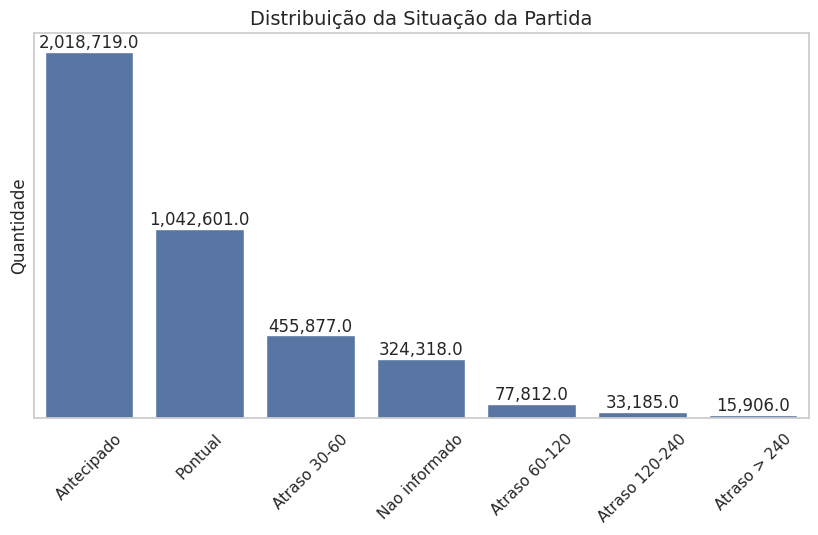

In [22]:
# Ajustar estilo (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(10,5))

# Contagem das categorias
ax = sns.countplot(
    data=df,
    x="situacao_partida",
    order=df["situacao_partida"].value_counts().index
)

# Título e rótulos
plt.title("Distribuição da Situação da Partida", fontsize=14)
plt.yticks([])
plt.ylabel("Quantidade")
plt.xlabel("")

# Rotacionar labels se necessário
plt.xticks(rotation=45)

# Adicionar valores acima das barras
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

plt.show()


In [24]:
df.to_csv("dataset_final.zip",
          index=False,
          compression="zip",
          encoding="utf-8")